In [5]:
import numpy as np 
import pandas as pd 

import os 

import matplotlib.pyplot as plt 

import PIL 
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import layers

In [6]:
dir1="../input/chest-xray-pneumonia/chest_xray/train/"
train_generator=ImageDataGenerator(rescale=1/255)
train_generator=train_generator.flow_from_directory(
dir1,target_size=(200,200),batch_size=4,class_mode="binary")

Found 5216 images belonging to 2 classes.


In [7]:
dir2="../input/chest-xray-pneumonia/chest_xray/test/"
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(
dir2 ,target_size=(200,200),batch_size=4,class_mode="binary")

Found 624 images belonging to 2 classes.


In [8]:
dir3="../input/chest-xray-pneumonia/chest_xray/val/"
val_generator=ImageDataGenerator(rescale=1/255)
val_generator=val_generator.flow_from_directory(
dir3 ,target_size=(200,200),batch_size=4,class_mode="binary")

Found 16 images belonging to 2 classes.


In [9]:
cnn=Sequential()
cnn.add(layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation="relu"))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64,(3,3),activation="relu"))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Conv2D(128,(3,3),activation="relu"))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(256,(3,3),activation="relu"))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Dense(256,activation="relu"))
cnn.add(layers.Dense(1,activation="sigmoid"))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0

In [10]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [11]:
history=cnn.fit_generator(train_generator,validation_data=val_generator,epochs=10,verbose=1)

Train for 1304 steps, validate for 4 steps
Epoch 1/10
1304/1304 [==============================] - 240s 184ms/step - loss: 0.2525 - accuracy: 0.9005 - val_loss: 0.3457 - val_accuracy: 0.8125
Epoch 2/10
1304/1304 [==============================] - 232s 178ms/step - loss: 0.1357 - accuracy: 0.9526 - val_loss: 0.7329 - val_accuracy: 0.7500
Epoch 3/10
1304/1304 [==============================] - 225s 173ms/step - loss: 0.1133 - accuracy: 0.9601 - val_loss: 0.0790 - val_accuracy: 1.0000
Epoch 4/10
1304/1304 [==============================] - 225s 173ms/step - loss: 0.0813 - accuracy: 0.9716 - val_loss: 0.1674 - val_accuracy: 0.8750
Epoch 5/10
1304/1304 [==============================] - 227s 174ms/step - loss: 0.0763 - accuracy: 0.9734 - val_loss: 0.1562 - val_accuracy: 0.8750
Epoch 6/10
1304/1304 [==============================] - 226s 173ms/step - loss: 0.0581 - accuracy: 0.9783 - val_loss: 0.1436 - val_accuracy: 0.9375
Epoch 7/10
1304/1304 [==============================] - 226s 173ms/st

Text(0.5, 1.0, 'Training Accuracy Over Epochs')

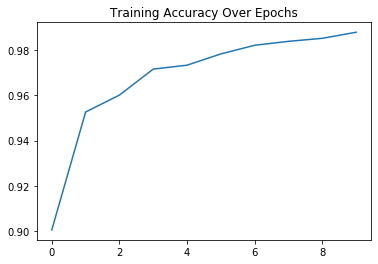

In [14]:
plt.plot(history.history["accuracy"])
plt.title("Training Accuracy Over Epochs")

Text(0.5, 1.0, 'Validation Accuracy Over Epochs')

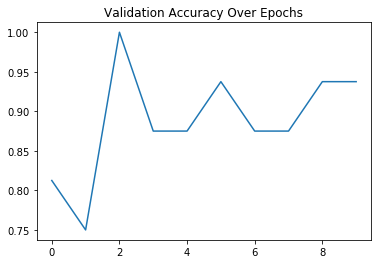

In [15]:
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Validation Accuracy Over Epochs")